<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/slump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=6e3a5596a73f0d435270043811a16707b885014507ce84b0c662e17eb1b7eb97
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving csv_result-slump.csv to csv_result-slump.csv


In [ ]:
import pandas as pd
df = pd.read_csv("csv_result-slump.csv")
df.head()
y_col = [
'SLUMP_cm',
'FLOW_cm',
'Compressive_Strength_Mpa'

]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,SLUMP_cm,FLOW_cm,Compressive_Strength_Mpa
0,23.0,62.0,34.99
1,0.0,20.0,41.14
2,1.0,20.0,41.81
3,3.0,21.5,42.08
4,20.0,64.0,26.82


In [ ]:
X

,Cemment,Slag,Fly_ash,Water,SP,Coarse_Aggr,Fine_Aggr
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0
...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))

# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler


In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor

rfg = MultiOutputRegressor(TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error'))
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=rfg, transformer=target_transformer)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)




Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.06406807097233849

Generation 2 - Current best internal CV score: -0.06372495966767602

Generation 3 - Current best internal CV score: -0.06166450989956823

Generation 4 - Current best internal CV score: -0.060601336658103425

Generation 5 - Current best internal CV score: -0.060601336658103425

Best pipeline: GradientBoostingRegressor(RidgeCV(input_matrix), alpha=0.85, learning_rate=0.1, loss=huber, max_depth=1, max_features=0.55, min_samples_leaf=6, min_samples_split=5, n_estimators=100, subsample=0.7000000000000001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.04901592498060988

Generation 2 - Current best internal CV score: -0.04901592498060988

Generation 3 - Current best internal CV score: -0.0489193922095675

Generation 4 - Current best internal CV score: -0.0489193922095675

Generation 5 - Current best internal CV score: -0.047101956212195636

Best pipeline: RandomForestRegressor(RobustScaler(ZeroCount(RidgeCV(input_matrix))), bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=8, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004053866490237026

Generation 2 - Current best internal CV score: -0.004053866490237026

Generation 3 - Current best internal CV score: -0.004053866490237026

Generation 4 - Current best internal CV score: -0.004053866490237026

Generation 5 - Current best internal CV score: -0.00045847556033925044

Best pipeline: RidgeCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


0.7026173355265176

In [ ]:
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE  is',rmse1)
mae1=mean_absolute_error(y_test, y_pred)
print('MAE is',mae1)

# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    #rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
    num = np.sum((np.square(true - pred)) / n)  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss

rrmse2=relative_root_mean_squared_error(y_test,y_pred)
arrmse2=mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("rrmse =",rrmse2)
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 7.457924542609205
MAE is 4.559035640774528
rmse_per_output: [ 4.29043863 12.1668322   0.64980462]
rrmse = SLUMP_cm                    0.014333
FLOW_cm                     0.040646
Compressive_Strength_Mpa    0.002171
dtype: float64
arrmse = 0.01904984872640831
Percentage arrmse = 1.90%


In [ ]:
y_pred

array([[19.4146784 , 52.84706948, 38.11880759],
       [23.1323789 , 59.66362953, 41.0617514 ],
       [19.63982679, 56.34205416, 29.67878787],
       [21.57810518, 58.88664242, 44.5197094 ],
       [-1.66849074, 24.69621357, 42.28473368],
       [ 9.22355595, 31.84685864, 34.07444662],
       [20.44250365, 56.07441564, 32.82492562],
       [23.71913138, 60.50910497, 25.25960824],
       [22.81011785, 62.99821053, 35.00068837],
       [21.72088107, 52.75856467, 28.34062865],
       [21.60769401, 46.29240311, 30.52504887],
       [23.4934158 , 62.62372953, 26.15032257],
       [19.46195349, 59.10808695, 44.73539539],
       [22.81371614, 66.47176438, 38.36753968],
       [17.05509358, 52.71877089, 32.03399558],
       [18.70840425, 45.57271002, 34.92158589],
       [22.16995077, 49.94199296, 29.86952367],
       [18.3687932 , 57.62274947, 33.06951039],
       [18.33740055, 45.03178767, 33.84952835],
       [11.24834954, 30.98091171, 36.8176236 ],
       [16.2044601 , 32.16068113, 17.428

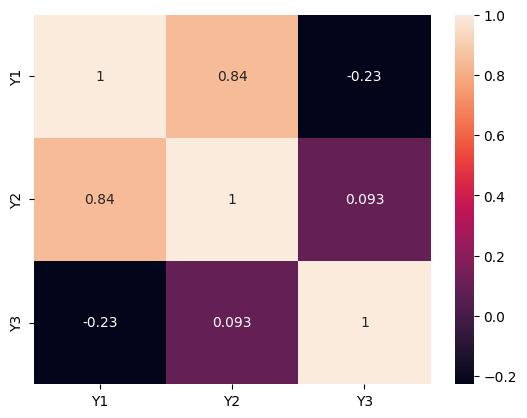

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000)
chain = RegressorChain(base_estimator=reg, order=[0,1,2])
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=chain, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
model.score(X_test, y_test)

[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5004774106754649

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse2=math.sqrt(mean_squared_error(y_test, y_pred2))
print('RMSE  is',rmse2)
mae2=mean_absolute_error(y_test, y_pred2)
print('MAE is',mae2)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred2)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("rrmse =",rrmse2)
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

RMSE  is 7.7873038185013215
MAE is 5.538486378820426
rmse_per_output: [ 5.88177889 11.52077248  3.82135851]
rrmse = SLUMP_cm                    0.019261
FLOW_cm                     0.037726
Compressive_Strength_Mpa    0.012514
dtype: float64
arrmse = 0.023166870288071437
Percentage arrmse = 2.32%


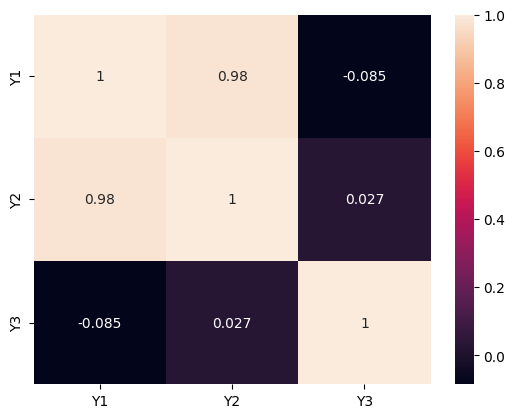

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y


In [ ]:
import numpy as np
from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)
#X = np.dtype('float64')




Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -53.55414755685405

Generation 2 - Current best internal CV score: -53.55414755685405

Generation 3 - Current best internal CV score: -53.55414755685405

Generation 4 - Current best internal CV score: -49.16321698585802

Generation 5 - Current best internal CV score: -49.16321698585802

Best pipeline: RandomForestRegressor(RidgeCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False)), bootstrap=True, max_features=0.3, min_samples_leaf=2, min_samples_split=14, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -34.77356965619267

Generation 2 - Current best internal CV score: -34.77356965619267

Generation 3 - Current best internal CV score: -34.77356965619267

Generation 4 - Current best internal CV score: -34.76246997953446

Generation 5 - Current best internal CV score: -33.8183992488613

Best pipeline: LinearSVR(MinMaxScaler(input_matrix), C=10.0, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=0.0001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7.0939217475767675

Generation 2 - Current best internal CV score: -0.8554137568040702

Generation 3 - Current best internal CV score: -0.8554137568040702

Generation 4 - Current best internal CV score: -0.8554137568040702

Generation 5 - Current best internal CV score: -0.8554137568040702

Best pipeline: LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=False)


In [ ]:
Ypred2 = reg2.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = np.abs(r2_score(y_test, Ypred2))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.6527455590880016


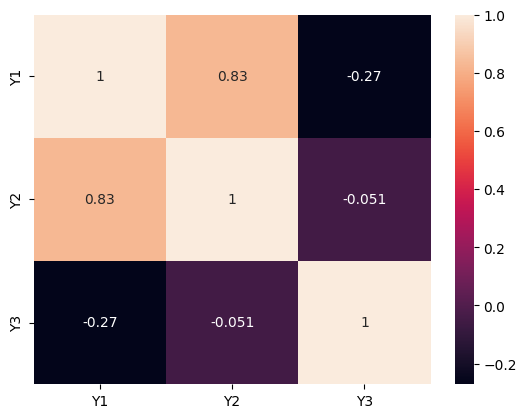

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 6.54009906131805
MAE  is 4.642995508595054
rmse_per_output: [5.37435339 9.651761   2.50569801]
relative_root_mean_squared_error = SLUMP_cm                    0.017855
FLOW_cm                     0.032066
Compressive_Strength_Mpa    0.008325
dtype: float64
arrmse = 0.01941498698671261
Percentage arrmse = 1.94%
